This notebook is part of [**Byron v0.8**](https://pypi.org/project/byron/)  
Copyright 2023-24 Giovanni Squillero and Alberto Tonda  
SPDX-License-Identifier: [Apache-2.0](https://www.apache.org/licenses/LICENSE-2.0) 

In [1]:
try:
    import byron
except ModuleNotFoundError:
    !pip install -U byron
    import byron

/var/folders/31/dkl97hks2c14b663vl55pt440000gn/T/ipykernel_24263/288499090.py:2: ByronPerformanceWarning: 
  Paranoia checks are enabled in this notebook: performances can be significantly impaired
  [see https://cad-polito-it.github.io/byron/paranoia for details]
  import byron


# Variables

No more *prologues* or *epilogues* in definitions.

; 🖋 n7 ➜ Frame❬FrameSequence#1❭
n8 = 57  ; 🖋 n7.n8 ➜ Macro❬User#1❭
var = func(n8)  ; 🖋 n7.n9 ➜ Macro❬User#2❭



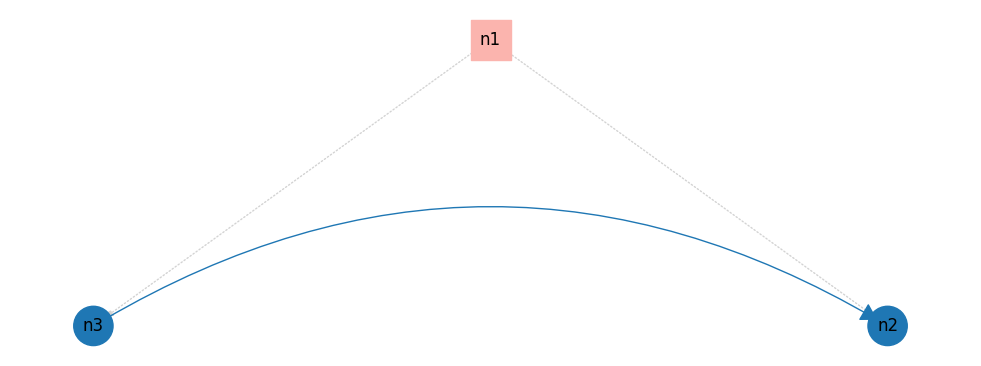

In [2]:
variable = byron.f.macro('{_node} = {value}', value=byron.f.integer_parameter(0, 256), _label='')
function = byron.f.macro("var = func({var})", var=byron.f.global_reference(variable))
program = byron.f.sequence([variable, function])
byron.f.as_forest(program)
byron.f.as_text(program)

Variables can be created as needed (aka. "pro re nata")

In [3]:
placeholder = byron.f.sequence(["{_comment} Dump variables here!"])
variable = byron.f.macro('{_node} = {value}', value=byron.f.integer_parameter(0, 256), _label='')
variable.force_parent(placeholder)  # force variables to appear in a given position
function = byron.f.macro("var = func({var})", var=byron.f.global_reference(variable, creative_zeal=1))
# creative_zeal = n (int) -> target is chosen among {existing_vars + n * new_vars}
# creative_zeal = p (float) -> target is a new variable with probability p
bunch = byron.f.bunch([function], size=8)
program = byron.f.sequence([placeholder, bunch])
byron.f.as_text(program)

; 🖋 n10 ➜ Frame❬FrameSequence#2❭
; 🖋 n10.n11 ➜ Frame❬SingleFrame#1❭
; Dump variables here!  ; 🖋 n10.n11.n12 ➜ Macro❬Text#1❭
n22 = 15  ; 🖋 n22 ➜ Macro❬User#1❭
n23 = 112  ; 🖋 n23 ➜ Macro❬User#1❭
n24 = 142  ; 🖋 n24 ➜ Macro❬User#1❭
; 🖋 n10.n13 ➜ Frame❬MacroArray#1❭
var = func(n22)  ; 🖋 n10.n13.n14 ➜ Macro❬User#3❭
var = func(n22)  ; 🖋 n10.n13.n15 ➜ Macro❬User#3❭
var = func(n22)  ; 🖋 n10.n13.n16 ➜ Macro❬User#3❭
var = func(n22)  ; 🖋 n10.n13.n17 ➜ Macro❬User#3❭
var = func(n22)  ; 🖋 n10.n13.n18 ➜ Macro❬User#3❭
var = func(n23)  ; 🖋 n10.n13.n19 ➜ Macro❬User#3❭
var = func(n24)  ; 🖋 n10.n13.n20 ➜ Macro❬User#3❭
var = func(n23)  ; 🖋 n10.n13.n21 ➜ Macro❬User#3❭



More complex

In [4]:
initialized_variable = byron.f.macro('var {_node} = {value}', value=byron.f.integer_parameter(0, 256), _label='')
bunch_of_initialized_variables = byron.f.bunch([initialized_variable], size=(1, 5))
uninitialized_variable = byron.f.macro('var {_node}', _label='')
bunch_of_uninitialized_variables = byron.f.bunch([uninitialized_variable], size=(0, 10, 0))

variables = byron.f.sequence([bunch_of_initialized_variables, bunch_of_uninitialized_variables])

operation = byron.f.macro("{dst} = func({arg})",
                          dst=byron.f.global_reference(variables),
                          arg=byron.f.global_reference(variables, creative_zeal=1))

bunch_of_operations = byron.f.bunch([operation], size=10)
program = byron.f.sequence([variables, bunch_of_operations])
byron.f.as_text(program, seed=None)

; 🖋 n46 ➜ Frame❬FrameSequence#4❭
; 🖋 n46.n47 ➜ Frame❬FrameSequence#3❭
; 🖋 n46.n47.n48 ➜ Frame❬MacroBunch#1❭
var n49 = 82  ; 🖋 n46.n47.n48.n49 ➜ Macro❬User#4❭
var n50 = 207  ; 🖋 n46.n47.n48.n50 ➜ Macro❬User#4❭
var n51 = 13  ; 🖋 n46.n47.n48.n51 ➜ Macro❬User#4❭
; 🖋 n46.n47.n52 ➜ Frame❬MacroBunch#2❭
; 🖋 n46.n53 ➜ Frame❬MacroArray#2❭
n49 = func(n50)  ; 🖋 n46.n53.n54 ➜ Macro❬User#5❭
n50 = func(n49)  ; 🖋 n46.n53.n55 ➜ Macro❬User#5❭
n49 = func(n51)  ; 🖋 n46.n53.n56 ➜ Macro❬User#5❭
n49 = func(n49)  ; 🖋 n46.n53.n57 ➜ Macro❬User#5❭
n51 = func(n51)  ; 🖋 n46.n53.n58 ➜ Macro❬User#5❭
n51 = func(n51)  ; 🖋 n46.n53.n59 ➜ Macro❬User#5❭
n51 = func(n51)  ; 🖋 n46.n53.n60 ➜ Macro❬User#5❭
n49 = func(n51)  ; 🖋 n46.n53.n61 ➜ Macro❬User#5❭
n49 = func(n50)  ; 🖋 n46.n53.n62 ➜ Macro❬User#5❭
n49 = func(n49)  ; 🖋 n46.n53.n63 ➜ Macro❬User#5❭



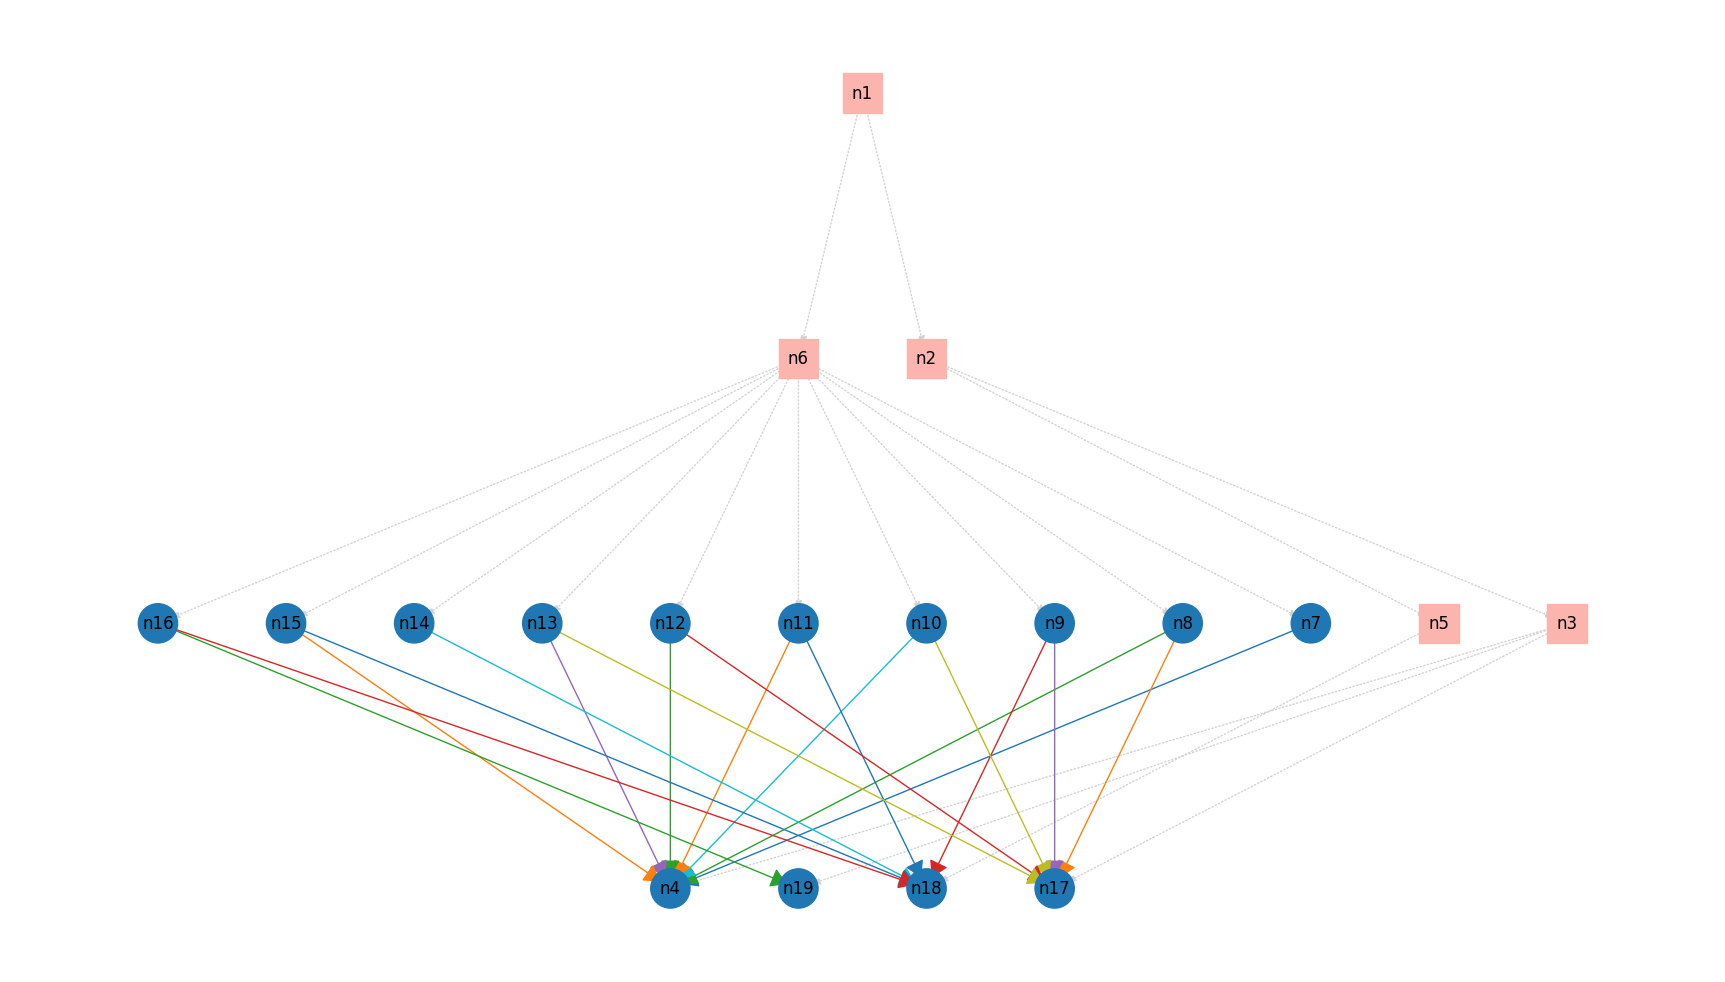

In [5]:
byron.f.as_forest(program)